# 参数

In [1]:
TRAIN_SIZE = 5000
VAL_SIZE = 1000

# 导入mnist数据集

In [2]:
# 导入mnist
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# 拆分训练集和测试集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 查看训练数据

In [4]:
# 查看数据类型
type(train_images)

numpy.ndarray

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 查看测试数据

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 作图查看mnist

In [9]:
import numpy as np
import matplotlib.pyplot as plt
digits = np.concatenate(train_images[:10], axis=1) 
plt.imshow(digits)
plt.show()

<Figure size 640x480 with 1 Axes>

# 从训练集中提取出验证集

In [10]:
val_images, val_labels = train_images[:VAL_SIZE], train_labels[:VAL_SIZE]
new_train_images, new_train_labels = train_images[-TRAIN_SIZE:], train_labels[-TRAIN_SIZE:]
new_train_images.shape

(5000, 28, 28)

# 输入输出转成向量

In [11]:
#  输入的28*28图像转成向量  用flatten
train_vectors = new_train_images.reshape((TRAIN_SIZE, 28 * 28))
test_vectors = test_images.reshape((10000, 28 * 28))
val_vectors = val_images.reshape((VAL_SIZE, 28 * 28))

# 检查训练集输入
train_vectors.shape

(5000, 784)

In [12]:
from keras.utils import to_categorical

# 将labels转为one-hot向量
train_one_hots = to_categorical(new_train_labels)
test_one_hots = to_categorical(test_labels)
val_one_hots = to_categorical(val_labels)

# 检查训练集输出
train_one_hots.shape

(5000, 10)

# 归一化

In [13]:
print('归一化前：', train_vectors[0][110:150])
print()

train_vectors_norm = train_vectors.astype('float32') / 255
test_vectors_norm = test_vectors.astype('float32') / 255
val_vectors_norm = val_vectors.astype('float32') / 255

print('归一化后：', train_vectors_norm[0][110:150])

归一化前： [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  38 237 220  11   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]

归一化后： [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.14901961 0.92941177 0.8627451  0.04313726
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


# 搭建网络

In [14]:
# 导入
from keras import models
from keras import layers
from keras import regularizers
from keras import initializers


# 搭建网路
network = models.Sequential()
kernel_regularizer =  None #regularizers.l2(1)
kernel_initializer= 'glorot_uniform'
activation =None#layers.LeakyReLU(alpha=0.3)
activation_layer = layers.LeakyReLU(alpha=0.3) #layers.Activation('relu')

# 第一层
network.add(layers.Dense(64, activation=activation, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer, input_shape=(28 * 28,))) # relu
network.add(layers.BatchNormalization())
network.add(activation_layer)

for i in range(50):
    network.add(layers.Dense(64, activation=activation , kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)) # relu, sigmoid
    network.add(layers.BatchNormalization())
    network.add(activation_layer)
    
network.add(layers.Dense(10, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer))
network.add(layers.BatchNormalization())
network.add( layers.Activation('softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

# 编译网络

In [15]:
from keras import optimizers
network.compile(optimizer=optimizers.adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) #mean_squared_error


# 训练

In [16]:
history = network.fit(train_vectors_norm, train_one_hots, epochs=200, batch_size=256, validation_data=(val_vectors_norm, val_one_hots))

Train on 5000 samples, validate on 1000 samples
Epoch 1/200
5000/5000 [==============================] - 26s 5ms/step - loss: 2.5287 - accuracy: 0.1022 - val_loss: 2.3026 - val_accuracy: 0.0870
Epoch 2/200
5000/5000 [==============================] - 1s 258us/step - loss: 2.3347 - accuracy: 0.1092 - val_loss: 2.2896 - val_accuracy: 0.1020
Epoch 3/200
5000/5000 [==============================] - 1s 259us/step - loss: 2.3103 - accuracy: 0.1054 - val_loss: 2.2999 - val_accuracy: 0.1180
Epoch 4/200
5000/5000 [==============================] - 1s 256us/step - loss: 2.3046 - accuracy: 0.1038 - val_loss: 2.3006 - val_accuracy: 0.1160
Epoch 5/200
5000/5000 [==============================] - 1s 259us/step - loss: 2.3040 - accuracy: 0.1130 - val_loss: 2.3007 - val_accuracy: 0.1170
Epoch 6/200
5000/5000 [==============================] - 1s 246us/step - loss: 2.3040 - accuracy: 0.1152 - val_loss: 2.3004 - val_accuracy: 0.1170
Epoch 7/200
5000/5000 [==============================] - 1s 242us/step 

5000/5000 [==============================] - 1s 245us/step - loss: 2.0533 - accuracy: 0.1946 - val_loss: 4.8595 - val_accuracy: 0.2100
Epoch 57/200
5000/5000 [==============================] - 1s 232us/step - loss: 2.0926 - accuracy: 0.1950 - val_loss: 2.8581 - val_accuracy: 0.2090
Epoch 58/200
5000/5000 [==============================] - 1s 237us/step - loss: 2.0825 - accuracy: 0.1918 - val_loss: 2.3279 - val_accuracy: 0.2100
Epoch 59/200
5000/5000 [==============================] - 1s 232us/step - loss: 2.1468 - accuracy: 0.1852 - val_loss: 2.1635 - val_accuracy: 0.1980
Epoch 60/200
5000/5000 [==============================] - 1s 234us/step - loss: 2.1839 - accuracy: 0.1702 - val_loss: 2.0393 - val_accuracy: 0.1860
Epoch 61/200
5000/5000 [==============================] - 1s 240us/step - loss: 2.2540 - accuracy: 0.1554 - val_loss: 2.2436 - val_accuracy: 0.2000
Epoch 62/200
5000/5000 [==============================] - 1s 238us/step - loss: 2.2831 - accuracy: 0.1498 - val_loss: 2.0930 

5000/5000 [==============================] - 1s 235us/step - loss: 2.2104 - accuracy: 0.1524 - val_loss: 2.0960 - val_accuracy: 0.2170
Epoch 112/200
5000/5000 [==============================] - 1s 232us/step - loss: 2.2952 - accuracy: 0.1366 - val_loss: 2.1289 - val_accuracy: 0.2120
Epoch 113/200
5000/5000 [==============================] - 1s 234us/step - loss: 2.3007 - accuracy: 0.1338 - val_loss: 2.1596 - val_accuracy: 0.2150
Epoch 114/200
5000/5000 [==============================] - 1s 234us/step - loss: 2.2736 - accuracy: 0.1384 - val_loss: 2.1694 - val_accuracy: 0.2140
Epoch 115/200
5000/5000 [==============================] - 1s 232us/step - loss: 2.2725 - accuracy: 0.1392 - val_loss: 2.1655 - val_accuracy: 0.2140
Epoch 116/200
5000/5000 [==============================] - 1s 232us/step - loss: 2.2625 - accuracy: 0.1404 - val_loss: 2.1616 - val_accuracy: 0.2150
Epoch 117/200
5000/5000 [==============================] - 1s 233us/step - loss: 2.2577 - accuracy: 0.1466 - val_loss: 2

5000/5000 [==============================] - 1s 231us/step - loss: 2.0633 - accuracy: 0.1956 - val_loss: 2.0013 - val_accuracy: 0.2170
Epoch 167/200
5000/5000 [==============================] - 1s 231us/step - loss: 2.0430 - accuracy: 0.1974 - val_loss: 1.9767 - val_accuracy: 0.2210
Epoch 168/200
5000/5000 [==============================] - 1s 231us/step - loss: 2.0341 - accuracy: 0.1912 - val_loss: 1.9807 - val_accuracy: 0.1990
Epoch 169/200
5000/5000 [==============================] - 1s 235us/step - loss: 2.0313 - accuracy: 0.2004 - val_loss: 1.9650 - val_accuracy: 0.2250
Epoch 170/200
5000/5000 [==============================] - 1s 235us/step - loss: 2.0352 - accuracy: 0.1990 - val_loss: 1.9625 - val_accuracy: 0.2260
Epoch 171/200
5000/5000 [==============================] - 1s 231us/step - loss: 2.0461 - accuracy: 0.1940 - val_loss: 1.9660 - val_accuracy: 0.2260
Epoch 172/200
5000/5000 [==============================] - 1s 232us/step - loss: 2.0292 - accuracy: 0.1950 - val_loss: 1

In [17]:
# 取出训练的中间数据：损失和准确度
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

In [18]:
# 查看准确率
train_best_acc = f'{round(acc_values[-1]*100,2)}%'
val_best_acc =  f'{round(val_acc_values[-1]*100,2)}%'
print(f"训练集准确率为：{train_best_acc}， 验证集准确率为：{val_best_acc}")

训练集准确率为：14.88%， 验证集准确率为：19.3%


# 作图

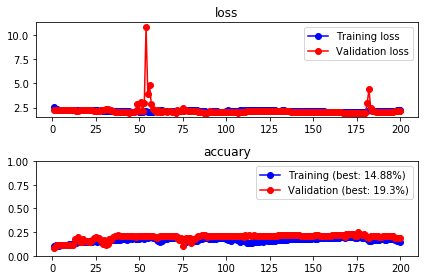

In [19]:

fig, axes = plt.subplots(2,1)
epochs = range(1, len(loss_values) + 1)

# 损失
axes[0].plot(epochs, loss_values, 'b-o', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'r-o', label='Validation loss')
axes[0].legend()
axes[0].set_title('loss')

# 准确度
axes[1].plot(epochs, acc_values, 'b-o', label=f'Training (best: {train_best_acc})')
axes[1].plot(epochs, val_acc_values, 'r-o', label=f'Validation (best: {val_best_acc})')
axes[1].legend()
axes[1].set_title('accuary')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# 测试

In [20]:
test_loss, test_acc = network.evaluate(test_vectors_norm, test_one_hots)

10000/10000 [==============================] - 2s 180us/step


# 自定义预测

In [21]:
# network.predict(test_vectors_norm[0])
test_vectors_norm[0].shape

(784,)